Aleksandra Bednarczuk

# Predictors of elderly citizens willingness to stay in the neighbourhood
# Logistic regression

Original dataset, including barris among predictors

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from imblearn.over_sampling import SMOTE

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from scipy import stats

In [3]:
data = pd.read_pickle("survey_transformed_20102019.pkl")

In [4]:
data.reset_index(drop=True, inplace=True)

In [5]:
data.head()

,Would_live_in_another_neighborhood,District,Woman,Car,House_size,Living_alone,No_of_people_in_the_house,Time_living_in_barri,Barri_evolution,BCN_evolution,...,BCN_transport,Barri_problem_with_security,Barri_problem_with_streets_cleaning,Barri_problem_with_mobility,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction,BCN_over_barri_transport,BCN_over_barri_management,BCN_over_barri_security
0,0.0,CIUTAT VELLA,1,1.0,51-100 M2,0,TWO,MORE THAN 10 YEARS,IT HAS WORSENED,IT HAS IMPROVED,...,GOOD,0,0,0,1,0,0,0,0,0
1,0.0,CIUTAT VELLA,1,0.0,101-150 M2,0,TWO,MORE THAN 10 YEARS,IT HAS IMPROVED,IT HAS IMPROVED,...,GOOD,0,0,0,0,0,0,0,0,0
2,1.0,CIUTAT VELLA,1,0.0,51-100 M2,0,TWO,I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD,IT HAS WORSENED,IT HAS WORSENED,...,GOOD,0,0,0,0,0,1,0,0,0
3,0.0,CIUTAT VELLA,1,0.0,< 50 M2,1,ONE,MORE THAN 10 YEARS,IT HAS IMPROVED,IT IS THE SAME,...,"NEITHER BAD, NOR GOOD",1,0,0,0,0,0,0,0,0
4,1.0,CIUTAT VELLA,0,0.0,< 50 M2,1,ONE,MORE THAN 10 YEARS,IT HAS IMPROVED,IT HAS IMPROVED,...,GOOD,0,0,0,0,0,0,0,0,0


In [6]:
data.shape

(12758, 30)

In [7]:
data.columns.tolist()

['Would_live_in_another_neighborhood',
 'District',
 'Woman',
 'Car',
 'House_size',
 'Living_alone',
 'No_of_people_in_the_house',
 'Time_living_in_barri',
 'Barri_evolution',
 'BCN_evolution',
 'Barri_future',
 'BCN_future',
 'Barri_satisfaction',
 'BCN_satisfaction',
 'Barri_security',
 'BCN_security',
 'Barri_management',
 'BCN_management',
 'Barri_comparison',
 'Barri_transport',
 'BCN_transport',
 'Barri_problem_with_security',
 'Barri_problem_with_streets_cleaning',
 'Barri_problem_with_mobility',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction',
 'BCN_over_barri_transport',
 'BCN_over_barri_management',
 'BCN_over_barri_security']

In [8]:
for i in data.columns.tolist():
    display(pd.crosstab(data[i], data.Would_live_in_another_neighborhood))

Would_live_in_another_neighborhood,0.0,1.0
Would_live_in_another_neighborhood,,
0.0,11340,0
1.0,0,1418


Would_live_in_another_neighborhood,0.0,1.0
District,,
CIUTAT VELLA,741,160
EIXAMPLE,1914,164
GRÀCIA,921,88
HORTA - GUINARDÓ,1290,180
LES CORTS,1021,49
NOU BARRIS,1158,209
SANT ANDREU,940,149
SANT MARTÍ,1359,166
SANTS - MONTJUÏC,972,203


Would_live_in_another_neighborhood,0.0,1.0
Woman,,
0,4446,526
1,6894,892


Would_live_in_another_neighborhood,0.0,1.0
Car,,
0.0,5874,719
1.0,5466,699


Would_live_in_another_neighborhood,0.0,1.0
House_size,,
101-150 M2,1373,117
51-100 M2,7843,1058
< 50 M2,793,124
> 150 M2,496,40
I DON'T KNOW,835,79


Would_live_in_another_neighborhood,0.0,1.0
Living_alone,,
0,7919,985
1,3421,433


Would_live_in_another_neighborhood,0.0,1.0
No_of_people_in_the_house,,
FOUR OR MORE,549,58
ONE,3421,433
THREE,1319,146
TWO,6051,781


Would_live_in_another_neighborhood,0.0,1.0
Time_living_in_barri,,
I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD,1628,128
LESS THAN 10 YEARS,573,165
MORE THAN 10 YEARS,9139,1125


Would_live_in_another_neighborhood,0.0,1.0
Barri_evolution,,
IT HAS IMPROVED,5962,573
IT HAS WORSENED,1984,465
IT IS THE SAME,3394,380


Would_live_in_another_neighborhood,0.0,1.0
BCN_evolution,,
IT HAS IMPROVED,3733,371
IT HAS WORSENED,4266,698
IT IS THE SAME,3341,349


Would_live_in_another_neighborhood,0.0,1.0
Barri_future,,
IT WILL IMPROVE,6375,608
IT WILL STAY THE SAME,3483,432
IT WILL WORSEN,1482,378


Would_live_in_another_neighborhood,0.0,1.0
BCN_future,,
IT WILL IMPROVE,5906,645
IT WILL STAY THE SAME,2795,359
IT WILL WORSEN,2639,414


Would_live_in_another_neighborhood,0.0,1.0
Barri_satisfaction,,
FAIRLY SATISFIED,749,368
NOT SATISFIED,45,94
SATISFIED,10546,956


Would_live_in_another_neighborhood,0.0,1.0
BCN_satisfaction,,
FAIRLY SATISFIED,1090,238
NOT SATISFIED,106,21
SATISFIED,10144,1159


Would_live_in_another_neighborhood,0.0,1.0
Barri_security,,
BAD,1528,363
GOOD,4707,423
"NEITHER BAD, NOR GOOD",5105,632


Would_live_in_another_neighborhood,0.0,1.0
BCN_security,,
BAD,1766,293
GOOD,3171,320
"NEITHER BAD, NOR GOOD",6403,805


Would_live_in_another_neighborhood,0.0,1.0
Barri_management,,
BAD,512,147
GOOD,5861,514
"NEITHER BAD, NOR GOOD",4967,757


Would_live_in_another_neighborhood,0.0,1.0
BCN_management,,
BAD,972,162
GOOD,4918,486
"NEITHER BAD, NOR GOOD",5450,770


Would_live_in_another_neighborhood,0.0,1.0
Barri_comparison,,
"NEITHER THE BEST, NOR THE WORST",4250,868
ONE OF THE BEST,6852,317
ONE OF THE WORST,238,233


Would_live_in_another_neighborhood,0.0,1.0
Barri_transport,,
BAD,1240,232
GOOD,9104,1016
"NEITHER BAD, NOR GOOD",996,170


Would_live_in_another_neighborhood,0.0,1.0
BCN_transport,,
BAD,845,146
GOOD,9333,1109
"NEITHER BAD, NOR GOOD",1162,163


Would_live_in_another_neighborhood,0.0,1.0
Barri_problem_with_security,,
0,9650,1170
1,1690,248


Would_live_in_another_neighborhood,0.0,1.0
Barri_problem_with_streets_cleaning,,
0,10400,1317
1,940,101


Would_live_in_another_neighborhood,0.0,1.0
Barri_problem_with_mobility,,
0,10833,1361
1,507,57


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_evolution,,
0,10282,1280
1,1058,138


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_future,,
0,9649,1141
1,1691,277


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_satisfaction,,
0,10835,1076
1,505,342


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_transport,,
0,10616,1279
1,724,139


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_management,,
0,11076,1339
1,264,79


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_security,,
0,10881,1276
1,459,142


In [9]:
data.columns.tolist()

['Would_live_in_another_neighborhood',
 'District',
 'Woman',
 'Car',
 'House_size',
 'Living_alone',
 'No_of_people_in_the_house',
 'Time_living_in_barri',
 'Barri_evolution',
 'BCN_evolution',
 'Barri_future',
 'BCN_future',
 'Barri_satisfaction',
 'BCN_satisfaction',
 'Barri_security',
 'BCN_security',
 'Barri_management',
 'BCN_management',
 'Barri_comparison',
 'Barri_transport',
 'BCN_transport',
 'Barri_problem_with_security',
 'Barri_problem_with_streets_cleaning',
 'Barri_problem_with_mobility',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction',
 'BCN_over_barri_transport',
 'BCN_over_barri_management',
 'BCN_over_barri_security']

In [10]:
x_var = [# 'District',
 'Woman',
 'Car',
 'House_size',
 'No_of_people_in_the_house',
 'Time_living_in_barri',
 #'Barri_evolution',
 #'BCN_evolution',
 #'Barri_future',
 #'BCN_future',
 'Barri_satisfaction',
 #'BCN_satisfaction',
 'Barri_security',
 #'BCN_security',
 'Barri_management',
 #'BCN_management',
 'Barri_comparison',
 'Barri_transport',
 #'BCN_transport',
 'Barri_problem_with_security',
 'Barri_problem_with_streets_cleaning',
 'Barri_problem_with_mobility',
 #'BCN_over_barri_evolution',
 #'BCN_over_barri_future',
 'BCN_over_barri_satisfaction',
 'BCN_over_barri_transport',
 'BCN_over_barri_management',
 'BCN_over_barri_security']

In [11]:
y = data['Would_live_in_another_neighborhood']

In [12]:
x = pd.get_dummies(data[x_var])

In [13]:
x.columns.tolist()

['Woman',
 'Car',
 'Barri_problem_with_security',
 'Barri_problem_with_streets_cleaning',
 'Barri_problem_with_mobility',
 'BCN_over_barri_satisfaction',
 'BCN_over_barri_transport',
 'BCN_over_barri_management',
 'BCN_over_barri_security',
 'House_size_101-150 M2',
 'House_size_51-100 M2',
 'House_size_< 50 M2',
 'House_size_> 150 M2',
 "House_size_I DON'T KNOW",
 'No_of_people_in_the_house_FOUR OR MORE',
 'No_of_people_in_the_house_ONE',
 'No_of_people_in_the_house_THREE',
 'No_of_people_in_the_house_TWO',
 'Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD',
 'Time_living_in_barri_LESS THAN 10 YEARS',
 'Time_living_in_barri_MORE THAN 10 YEARS',
 'Barri_satisfaction_FAIRLY SATISFIED',
 'Barri_satisfaction_NOT SATISFIED',
 'Barri_satisfaction_SATISFIED',
 'Barri_security_BAD',
 'Barri_security_GOOD',
 'Barri_security_NEITHER BAD, NOR GOOD',
 'Barri_management_BAD',
 'Barri_management_GOOD',
 'Barri_management_NEITHER BAD, NOR GOOD',
 'Barri_comparison_NEITHER THE BEST, NOR 

In [14]:
for i in ['House_size_< 50 M2',
 
 'No_of_people_in_the_house_ONE',
 
 'Time_living_in_barri_LESS THAN 10 YEARS',
 
 'Barri_satisfaction_SATISFIED',
 
 'Barri_security_GOOD',
 
 'Barri_management_GOOD',
 
 'Barri_comparison_ONE OF THE BEST',
 
 'Barri_transport_GOOD']:
    del x[i]

In [15]:
x = sm.add_constant(x)

# Logit

In [16]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                12758
Model:                                            GLM   Df Residuals:                    12729
Model Family:                                Binomial   Df Model:                           28
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -3714.0
Date:                                Sun, 09 May 2021   Deviance:                       7428.0
Time:                                        17:47:18   Pearson chi2:                 1.28e+04
No. Iterations:                                     6                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -2.3555      0.160    -14.710      0.000      -2.669      -2.042
Woman                                                            0.0626      0.066      0.949      0.343      -0.067       0.192
Car                                                              0.1580      0.069      2.285      0.022       0.022       0.293
Barri_problem_with_security                                     -0.1424      0.087     -1.632      0.103      -0.313       0.029
Barri_problem_with_streets_cleaning                             -0.2206      0.118     -1.868      0.062      -0.452       0.011
Barri_problem_with_mobility                                     -0.1818      0.159     -1.146      0.252      -0.493       0.129
BCN_over_barri_satisfaction                                      0.4782      0.142      3.372      0.001       0.200       0.756
BCN_over_barri_transport                                         0.0583      0.165      0.354      0.723      -0.265       0.381
BCN_over_barri_management                                        0.2066      0.225      0.920      0.358      -0.234       0.647
BCN_over_barri_security                                          0.3302      0.140      2.363      0.018       0.056       0.604
House_size_101-150 M2                                           -0.1605      0.153     -1.048      0.295      -0.461       0.140
House_size_51-100 M2                                             0.0231      0.116      0.199      0.842      -0.204       0.251
House_size_> 150 M2                                             -0.1348      0.210     -0.642      0.521      -0.546       0.276
House_size_I DON'T KNOW                                         -0.3348      0.168     -1.992      0.046      -0.664      -0.005
No_of_people_in_the_house_FOUR OR MORE                          -0.3803      0.163     -2.331      0.020      -0.700      -0.061
No_of_people_in_the_house_THREE                                 -0.1685      0.114     -1.474      0.141      -0.393       0.056
No_of_people_in_the_house_TWO                                   -0.0244      0.076     -0.319      0.749      -0.174       0.125
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -1.4139      0.141    -10.015      0.000      -1.691      -1.137
Time_living_in_barri_MORE THAN 10 YEARS                         -0.9339      0.106     -8.813      0.000      -1.142      -0.726
Barri_satisfaction_FAIRLY SATISFIED                              0.78

In [17]:
glm_logit_results.aic

7486.004603030209

In [18]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-112910.86421829318

In [19]:
glm_logit_results.pvalues.sort_values(ascending=False)

House_size_51-100 M2                                            8.421045e-01
Barri_management_BAD                                            7.655962e-01
No_of_people_in_the_house_TWO                                   7.494098e-01
BCN_over_barri_transport                                        7.234023e-01
Barri_security_NEITHER BAD, NOR GOOD                            6.583432e-01
House_size_> 150 M2                                             5.205919e-01
BCN_over_barri_management                                       3.577584e-01
Woman                                                           3.426602e-01
Barri_security_BAD                                              3.044761e-01
House_size_101-150 M2                                           2.945539e-01
Barri_problem_with_mobility                                     2.519146e-01
No_of_people_in_the_house_THREE                                 1.405795e-01
Barri_transport_NEITHER BAD, NOR GOOD                           1.306810e-01

In [20]:
for i in ['House_size_> 150 M2', 'House_size_101-150 M2', 'House_size_51-100 M2', "House_size_I DON'T KNOW"]:
    del x[i]

In [21]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                12758
Model:                                            GLM   Df Residuals:                    12733
Model Family:                                Binomial   Df Model:                           24
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -3719.1
Date:                                Sun, 09 May 2021   Deviance:                       7438.2
Time:                                        17:47:38   Pearson chi2:                 1.29e+04
No. Iterations:                                     6                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -2.3899      0.132    -18.125      0.000      -2.648      -2.131
Woman                                                            0.0456      0.066      0.694      0.487      -0.083       0.174
Car                                                              0.1575      0.068      2.301      0.021       0.023       0.292
Barri_problem_with_security                                     -0.1376      0.087     -1.579      0.114      -0.308       0.033
Barri_problem_with_streets_cleaning                             -0.2198      0.118     -1.861      0.063      -0.451       0.012
Barri_problem_with_mobility                                     -0.1788      0.159     -1.128      0.259      -0.490       0.132
BCN_over_barri_satisfaction                                      0.4760      0.142      3.359      0.001       0.198       0.754
BCN_over_barri_transport                                         0.0727      0.164      0.442      0.659      -0.250       0.395
BCN_over_barri_management                                        0.2110      0.224      0.941      0.347      -0.228       0.650
BCN_over_barri_security                                          0.3343      0.140      2.396      0.017       0.061       0.608
No_of_people_in_the_house_FOUR OR MORE                          -0.4087      0.162     -2.515      0.012      -0.727      -0.090
No_of_people_in_the_house_THREE                                 -0.1790      0.114     -1.571      0.116      -0.402       0.044
No_of_people_in_the_house_TWO                                   -0.0261      0.076     -0.344      0.731      -0.175       0.123
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -1.4084      0.141     -9.998      0.000      -1.684      -1.132
Time_living_in_barri_MORE THAN 10 YEARS                         -0.9216      0.105     -8.741      0.000      -1.128      -0.715
Barri_satisfaction_FAIRLY SATISFIED                              0.7889      0.127      6.212      0.000       0.540       1.038
Barri_satisfaction_NOT SATISFIED                                 1.6975      0.243      6.978      0.000       1.221       2.174
Barri_security_BAD                                               0.1248      0.110      1.136      0.256      -0.091       0.340
Barri_security_NEITHER BAD, NOR GOOD                            -0.0252      0.073     -0.344      0.731      -0.169       0.118
Barri_management_BAD                                             0.04

In [22]:
glm_logit_results.aic

7488.234631364554

In [23]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-112938.44984517804

In [24]:
glm_logit_results.pvalues.sort_values(ascending=False)

Barri_management_BAD                                            8.123527e-01
No_of_people_in_the_house_TWO                                   7.311912e-01
Barri_security_NEITHER BAD, NOR GOOD                            7.307266e-01
BCN_over_barri_transport                                        6.586516e-01
Woman                                                           4.874823e-01
BCN_over_barri_management                                       3.465223e-01
Barri_problem_with_mobility                                     2.592487e-01
Barri_security_BAD                                              2.560726e-01
Barri_transport_BAD                                             1.386371e-01
Barri_transport_NEITHER BAD, NOR GOOD                           1.374989e-01
Barri_management_NEITHER BAD, NOR GOOD                          1.206653e-01
No_of_people_in_the_house_THREE                                 1.161444e-01
Barri_problem_with_security                                     1.143578e-01

In [25]:
for i in ['Woman', 'Barri_security_NEITHER BAD, NOR GOOD', 'Barri_security_BAD', 
         'BCN_over_barri_transport', 'BCN_over_barri_management', 'Barri_problem_with_mobility',
          'Barri_management_BAD', 'Barri_management_NEITHER BAD, NOR GOOD']:
    del x[i]

In [26]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                12758
Model:                                            GLM   Df Residuals:                    12741
Model Family:                                Binomial   Df Model:                           16
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -3723.3
Date:                                Sun, 09 May 2021   Deviance:                       7446.6
Time:                                        17:49:11   Pearson chi2:                 1.29e+04
No. Iterations:                                     6                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -2.3352      0.119    -19.660      0.000      -2.568      -2.102
Car                                                              0.1565      0.067      2.328      0.020       0.025       0.288
Barri_problem_with_security                                     -0.1047      0.084     -1.242      0.214      -0.270       0.061
Barri_problem_with_streets_cleaning                             -0.2008      0.117     -1.710      0.087      -0.431       0.029
BCN_over_barri_satisfaction                                      0.4714      0.141      3.344      0.001       0.195       0.748
BCN_over_barri_security                                          0.4564      0.117      3.899      0.000       0.227       0.686
No_of_people_in_the_house_FOUR OR MORE                          -0.4101      0.162     -2.531      0.011      -0.728      -0.092
No_of_people_in_the_house_THREE                                 -0.1880      0.114     -1.654      0.098      -0.411       0.035
No_of_people_in_the_house_TWO                                   -0.0319      0.075     -0.424      0.671      -0.179       0.115
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -1.3868      0.140     -9.892      0.000      -1.662      -1.112
Time_living_in_barri_MORE THAN 10 YEARS                         -0.9120      0.105     -8.681      0.000      -1.118      -0.706
Barri_satisfaction_FAIRLY SATISFIED                              0.8356      0.124      6.721      0.000       0.592       1.079
Barri_satisfaction_NOT SATISFIED                                 1.7692      0.237      7.480      0.000       1.306       2.233
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 1.3449      0.071     19.060      0.000       1.207       1.483
Barri_comparison_ONE OF THE WORST                                2.3983      0.122     19.638      0.000       2.159       2.638
Barri_transport_BAD                                              0.2410      0.089      2.722      0.006       0.067       0.415
Barri_transport_NEITHER BAD, NOR GOOD                            0.1560      0.099      1.574      0.115      -0.038       0.350
================================================================================================================================
"""

In [27]:
glm_logit_results.aic

7480.647902153501

In [28]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-113005.6678848275

In [29]:
glm_logit_results.pvalues.sort_values(ascending=False)

No_of_people_in_the_house_TWO                                   6.712841e-01
Barri_problem_with_security                                     2.142401e-01
Barri_transport_NEITHER BAD, NOR GOOD                           1.154492e-01
No_of_people_in_the_house_THREE                                 9.810642e-02
Barri_problem_with_streets_cleaning                             8.731480e-02
Car                                                             1.991235e-02
No_of_people_in_the_house_FOUR OR MORE                          1.138039e-02
Barri_transport_BAD                                             6.493307e-03
BCN_over_barri_satisfaction                                     8.257536e-04
BCN_over_barri_security                                         9.667834e-05
Barri_satisfaction_FAIRLY SATISFIED                             1.802382e-11
Barri_satisfaction_NOT SATISFIED                                7.413054e-14
Time_living_in_barri_MORE THAN 10 YEARS                         3.919043e-18

In [30]:
for i in ['Barri_problem_with_security']:
    del x[i]

In [31]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                12758
Model:                                            GLM   Df Residuals:                    12742
Model Family:                                Binomial   Df Model:                           15
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -3724.1
Date:                                Sun, 09 May 2021   Deviance:                       7448.2
Time:                                        17:49:49   Pearson chi2:                 1.29e+04
No. Iterations:                                     6                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -2.3482      0.118    -19.848      0.000      -2.580      -2.116
Car                                                              0.1605      0.067      2.390      0.017       0.029       0.292
Barri_problem_with_streets_cleaning                             -0.1818      0.116     -1.561      0.118      -0.410       0.046
BCN_over_barri_satisfaction                                      0.4741      0.141      3.363      0.001       0.198       0.750
BCN_over_barri_security                                          0.4386      0.116      3.776      0.000       0.211       0.666
No_of_people_in_the_house_FOUR OR MORE                          -0.4121      0.162     -2.544      0.011      -0.730      -0.095
No_of_people_in_the_house_THREE                                 -0.1908      0.114     -1.679      0.093      -0.413       0.032
No_of_people_in_the_house_TWO                                   -0.0348      0.075     -0.463      0.644      -0.182       0.113
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -1.3859      0.140     -9.893      0.000      -1.660      -1.111
Time_living_in_barri_MORE THAN 10 YEARS                         -0.9134      0.105     -8.700      0.000      -1.119      -0.708
Barri_satisfaction_FAIRLY SATISFIED                              0.8317      0.124      6.692      0.000       0.588       1.075
Barri_satisfaction_NOT SATISFIED                                 1.7638      0.237      7.458      0.000       1.300       2.227
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 1.3400      0.070     19.022      0.000       1.202       1.478
Barri_comparison_ONE OF THE WORST                                2.3881      0.122     19.604      0.000       2.149       2.627
Barri_transport_BAD                                              0.2444      0.088      2.762      0.006       0.071       0.418
Barri_transport_NEITHER BAD, NOR GOOD                            0.1575      0.099      1.590      0.112      -0.037       0.352
================================================================================================================================
"""

In [32]:
glm_logit_results.aic

7480.211507162316

In [33]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-113013.5581936235

In [34]:
glm_logit_results.pvalues.sort_values(ascending=False)

No_of_people_in_the_house_TWO                                   6.436139e-01
Barri_problem_with_streets_cleaning                             1.184761e-01
Barri_transport_NEITHER BAD, NOR GOOD                           1.119240e-01
No_of_people_in_the_house_THREE                                 9.307913e-02
Car                                                             1.685848e-02
No_of_people_in_the_house_FOUR OR MORE                          1.095798e-02
Barri_transport_BAD                                             5.747085e-03
BCN_over_barri_satisfaction                                     7.698903e-04
BCN_over_barri_security                                         1.595370e-04
Barri_satisfaction_FAIRLY SATISFIED                             2.203204e-11
Barri_satisfaction_NOT SATISFIED                                8.805348e-14
Time_living_in_barri_MORE THAN 10 YEARS                         3.328150e-18
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    4.466221e-23

In [35]:
def glm_classification_table(results):
    df_classification_table = pd.DataFrame(y).join(pd.DataFrame(results.predict(x).round()))
    df_classification_table.rename(columns={'Would_live_in_another_neighborhood': 'y', 0: 'y_predict'}, inplace=True)
    return pd.crosstab(df_classification_table['y'], df_classification_table['y_predict'])

In [36]:
glm_classification_table(glm_logit_results)

y_predict,0.0,1.0
y,,
0.0,11246,94
1.0,1190,228


In [37]:
def plot_roc_auc(results):
    y_predict = results.predict(x)
    roc_auc = roc_auc_score(y, y_predict)
    fpr, tpr, thresholds = roc_curve(y, y_predict)
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

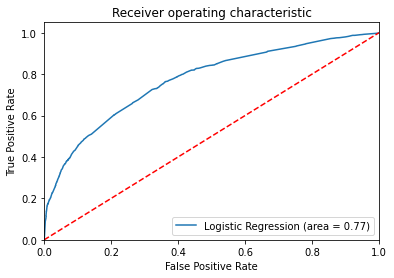

In [38]:
plot_roc_auc(glm_logit_results)

In [39]:
def odds_ratios(results):
    return np.exp(results.params)

In [40]:
odds_ratios(glm_logit_results)

const                                                            0.095541
Car                                                              1.174114
Barri_problem_with_streets_cleaning                              0.833785
BCN_over_barri_satisfaction                                      1.606523
BCN_over_barri_security                                          1.550460
No_of_people_in_the_house_FOUR OR MORE                           0.662270
No_of_people_in_the_house_THREE                                  0.826305
No_of_people_in_the_house_TWO                                    0.965828
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD     0.250094
Time_living_in_barri_MORE THAN 10 YEARS                          0.401162
Barri_satisfaction_FAIRLY SATISFIED                              2.297303
Barri_satisfaction_NOT SATISFIED                                 5.834555
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 3.819012
Barri_comparison_ONE OF THE WORST     

In [41]:
def pseudo_r2(results):
    return (1 - results.llf / results.llnull)

In [42]:
pseudo_r2(glm_logit_results)

0.16337122249477742

In [43]:
def adj_count_r2(results):
    df_classification_table = pd.DataFrame(y).join(pd.DataFrame(results.predict(x).round()))
    df_classification_table.rename(columns={'Would_live_in_another_neighborhood': 'y', 0: 'y_predict'}, inplace=True)
    df = pd.crosstab(df_classification_table['y'], df_classification_table['y_predict'])
    return round((df[0][0] + df[1][1] - (df[0][0]+df[1][0]))/(df[0][1]+df[1][1]),3)

In [44]:
adj_count_r2(glm_logit_results)

0.094

In [45]:
1 - np.exp((glm_logit_results.llnull - glm_logit_results.llf)*(2/glm_logit_results.nobs))

0.10774375660360092

# Probit

In [46]:
glm_probit = sm.GLM(y, x, family=sm.families.Binomial(link=sm.genmod.families.links.probit))
glm_probit_results = glm_probit.fit()
glm_probit_results.summary()

C:\Users\THINK\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                12758
Model:                                            GLM   Df Residuals:                    12742
Model Family:                                Binomial   Df Model:                           15
Link Function:                                 probit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -3727.4
Date:                                Sun, 09 May 2021   Deviance:                       7454.9
Time:                                        17:50:35   Pearson chi2:                 1.30e+04
No. Iterations:                                     7                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -1.3201      0.064    -20.734      0.000      -1.445      -1.195
Car                                                              0.0816      0.035      2.320      0.020       0.013       0.151
Barri_problem_with_streets_cleaning                             -0.1005      0.061     -1.659      0.097      -0.219       0.018
BCN_over_barri_satisfaction                                      0.2742      0.083      3.295      0.001       0.111       0.437
BCN_over_barri_security                                          0.2423      0.065      3.732      0.000       0.115       0.370
No_of_people_in_the_house_FOUR OR MORE                          -0.1948      0.084     -2.327      0.020      -0.359      -0.031
No_of_people_in_the_house_THREE                                 -0.1014      0.059     -1.713      0.087      -0.217       0.015
No_of_people_in_the_house_TWO                                   -0.0160      0.039     -0.407      0.684      -0.093       0.061
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -0.7259      0.074     -9.759      0.000      -0.872      -0.580
Time_living_in_barri_MORE THAN 10 YEARS                         -0.4803      0.058     -8.219      0.000      -0.595      -0.366
Barri_satisfaction_FAIRLY SATISFIED                              0.4663      0.072      6.450      0.000       0.325       0.608
Barri_satisfaction_NOT SATISFIED                                 1.0269      0.140      7.349      0.000       0.753       1.301
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 0.6701      0.034     19.438      0.000       0.602       0.738
Barri_comparison_ONE OF THE WORST                                1.2960      0.070     18.576      0.000       1.159       1.433
Barri_transport_BAD                                              0.1309      0.048      2.748      0.006       0.038       0.224
Barri_transport_NEITHER BAD, NOR GOOD                            0.0814      0.053      1.531      0.126      -0.023       0.186
================================================================================================================================
"""

In [47]:
glm_probit_results.aic

7486.872685917488

In [48]:
glm_probit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-113006.89701486831

In [49]:
glm_classification_table(glm_probit_results)

y_predict,0.0,1.0
y,,
0.0,11253,87
1.0,1200,218


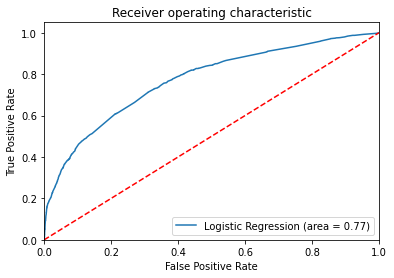

In [50]:
plot_roc_auc(glm_probit_results)

In [51]:
odds_ratios(glm_probit_results)

const                                                           0.267110
Car                                                             1.085027
Barri_problem_with_streets_cleaning                             0.904394
BCN_over_barri_satisfaction                                     1.315517
BCN_over_barri_security                                         1.274153
No_of_people_in_the_house_FOUR OR MORE                          0.823004
No_of_people_in_the_house_THREE                                 0.903578
No_of_people_in_the_house_TWO                                   0.984083
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    0.483898
Time_living_in_barri_MORE THAN 10 YEARS                         0.618601
Barri_satisfaction_FAIRLY SATISFIED                             1.594079
Barri_satisfaction_NOT SATISFIED                                2.792371
Barri_comparison_NEITHER THE BEST, NOR THE WORST                1.954362
Barri_comparison_ONE OF THE WORST                  

In [52]:
pseudo_r2(glm_probit_results)

0.16262299806085512

In [53]:
adj_count_r2(glm_probit_results)

0.092

# Scobit

In [54]:
glm_scobit = sm.GLM(y, x, family=sm.families.Binomial(link=sm.genmod.families.links.cloglog))
glm_scobit_results = glm_scobit.fit()
glm_scobit_results.summary()

C:\Users\THINK\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                12758
Model:                                            GLM   Df Residuals:                    12742
Model Family:                                Binomial   Df Model:                           15
Link Function:                                cloglog   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -3728.4
Date:                                Sun, 09 May 2021   Deviance:                       7456.8
Time:                                        17:50:39   Pearson chi2:                 1.27e+04
No. Iterations:                                     8                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -2.4891      0.104    -23.994      0.000      -2.692      -2.286
Car                                                              0.1460      0.059      2.471      0.013       0.030       0.262
Barri_problem_with_streets_cleaning                             -0.1576      0.104     -1.512      0.131      -0.362       0.047
BCN_over_barri_satisfaction                                      0.3495      0.110      3.172      0.002       0.134       0.566
BCN_over_barri_security                                          0.3555      0.095      3.758      0.000       0.170       0.541
No_of_people_in_the_house_FOUR OR MORE                          -0.3761      0.145     -2.589      0.010      -0.661      -0.091
No_of_people_in_the_house_THREE                                 -0.1549      0.101     -1.539      0.124      -0.352       0.042
No_of_people_in_the_house_TWO                                   -0.0177      0.066     -0.267      0.789      -0.147       0.112
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -1.1827      0.122     -9.727      0.000      -1.421      -0.944
Time_living_in_barri_MORE THAN 10 YEARS                         -0.7635      0.088     -8.678      0.000      -0.936      -0.591
Barri_satisfaction_FAIRLY SATISFIED                              0.7704      0.101      7.600      0.000       0.572       0.969
Barri_satisfaction_NOT SATISFIED                                 1.2599      0.164      7.679      0.000       0.938       1.581
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 1.2693      0.067     19.008      0.000       1.138       1.400
Barri_comparison_ONE OF THE WORST                                2.0568      0.099     20.762      0.000       1.863       2.251
Barri_transport_BAD                                              0.2071      0.076      2.739      0.006       0.059       0.355
Barri_transport_NEITHER BAD, NOR GOOD                            0.1208      0.086      1.412      0.158      -0.047       0.289
================================================================================================================================
"""

In [55]:
glm_scobit_results.aic

7488.834097264591

In [56]:
glm_scobit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-113004.93560352121

In [57]:
glm_classification_table(glm_scobit_results)

y_predict,0.0,1.0
y,,
0.0,11251,89
1.0,1209,209


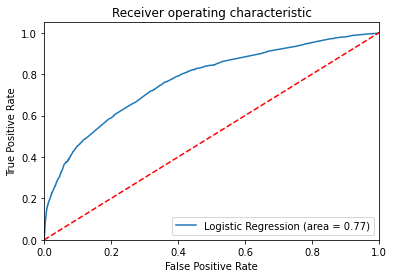

In [58]:
plot_roc_auc(glm_scobit_results)

In [59]:
odds_ratios(glm_scobit_results)

const                                                           0.082982
Car                                                             1.157203
Barri_problem_with_streets_cleaning                             0.854192
BCN_over_barri_satisfaction                                     1.418406
BCN_over_barri_security                                         1.426902
No_of_people_in_the_house_FOUR OR MORE                          0.686537
No_of_people_in_the_house_THREE                                 0.856492
No_of_people_in_the_house_TWO                                   0.982504
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    0.306465
Time_living_in_barri_MORE THAN 10 YEARS                         0.466026
Barri_satisfaction_FAIRLY SATISFIED                             2.160697
Barri_satisfaction_NOT SATISFIED                                3.525080
Barri_comparison_NEITHER THE BEST, NOR THE WORST                3.558327
Barri_comparison_ONE OF THE WORST                  

In [60]:
pseudo_r2(glm_scobit_results)

0.16240268031397864

In [61]:
adj_count_r2(glm_scobit_results)

0.085

In [62]:
print("AIC: ", glm_logit_results.aic, "BIC: ", glm_logit_results.bic)
print("AIC: ", glm_probit_results.aic, "BIC: ", glm_probit_results.bic)
print("AIC: ", glm_scobit_results.aic, "BIC: ", glm_scobit_results.bic)

AIC:  7480.211507162316 BIC:  -113013.5581936235
AIC:  7486.872685917488 BIC:  -113006.89701486831
AIC:  7488.834097264591 BIC:  -113004.93560352121


C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning
